# Deep Learning for Image Classification Assessment with Fashion MNIST Data
___

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [3]:
import matplotlib.pyplot as plt

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

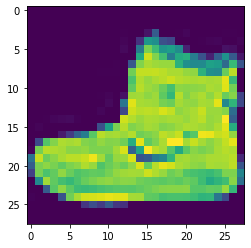

In [7]:
plt.imshow(x_train[0])

In [9]:
# 9 = Ankle boot
y_train[0]

9

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [10]:
x_train.max()

255

In [11]:
x_train.min()

0

In [12]:
x_train = x_train/255

In [13]:
x_test = x_test/255

___
**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [14]:
x_trainin.shape

(60000, 28, 28)

In [15]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
x_test = x_test.reshape(10000, 28, 28, 1)

___
**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
y_cat_train = to_categorical(y=y_train)

In [21]:
y_cat_train_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
y_cat_test = to_categorical(y=y_test)

In [23]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [34]:
x_train[0].shape

(28, 28, 1)

In [42]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
          
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
          
# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())
          
# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))
          
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [46]:
model.fit(x_train, y_cat_train, epochs=20, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 166us/sample - loss: 0.4449 - accuracy: 0.8403 - val_loss: 0.3464 - val_accuracy: 0.8746
Epoch 2/20
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3080 - accuracy: 0.8891 - val_loss: 0.2935 - val_accuracy: 0.8933
Epoch 3/20
60000/60000 [==============================] - 10s 161us/sample - loss: 0.2654 - accuracy: 0.9028 - val_loss: 0.2749 - val_accuracy: 0.8976
Epoch 4/20
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2382 - accuracy: 0.9122 - val_loss: 0.2612 - val_accuracy: 0.9029
Epoch 5/20
60000/60000 [==============================] - 10s 167us/sample - loss: 0.2139 - accuracy: 0.9204 - val_loss: 0.2630 - val_accuracy: 0.9035
Epoch 6/20
60000/60000 [==============================] - 10s 164us/sample - loss: 0.1947 - accuracy: 0.9268 - val_loss: 0.2634 - val_accuracy: 0.9058


### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**`m

In [49]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))

['loss', 'accuracy']
[0.2633973003447056, 0.9058]


In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
predictions = model.predict_classes(x_test)

In [56]:
y_cat_test.shape

(10000, 10)

#### Actual label of first element

In [57]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#### Predicted value of first element

In [58]:
predictions[0]

9

In [59]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

#### Classification Report

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.79      0.90      0.84      1000
           3       0.93      0.90      0.91      1000
           4       0.86      0.83      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.75      0.70      0.72      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#### Confusion Matrix

In [61]:
print(confusion_matrix(y_test, predictions))

[[851   1  27  10   4   2  97   0   8   0]
 [  1 984   2   5   1   0   7   0   0   0]
 [ 12   0 899   9  38   0  42   0   0   0]
 [ 14  17  13 898  22   0  35   0   1   0]
 [  0   1  94  22 832   0  50   0   1   0]
 [  0   0   0   0   0 978   0  16   0   6]
 [104   3 102  19  65   0 699   0   8   0]
 [  0   0   0   0   0   6   0 981   0  13]
 [  4   2   3   1   2   2   5   1 980   0]
 [  0   0   0   0   0   4   1  39   0 956]]


#### Confusion Matrix as a Heat Map

In [63]:
import seaborn as sns

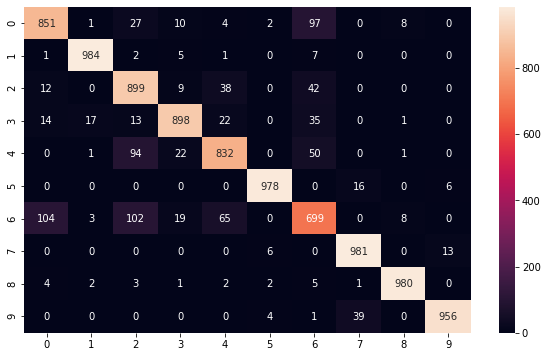

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.3g')

## Thank You
___